# Convex Hull Algorithm

## Introduction

The **convex hull** of a set of points $S$ in $\mathbb{R}^d$ is the smallest convex set that contains all points in $S$. Intuitively, if the points were nails on a board, the convex hull would be the shape formed by a rubber band stretched around all the nails.

## Mathematical Definition

Given a set of points $P = \{p_1, p_2, \ldots, p_n\}$ in $\mathbb{R}^2$, the convex hull $\text{CH}(P)$ is defined as:

$$\text{CH}(P) = \left\{ \sum_{i=1}^{n} \lambda_i p_i \;\middle|\; \lambda_i \geq 0, \sum_{i=1}^{n} \lambda_i = 1 \right\}$$

This represents all possible convex combinations of the points in $P$.

## Graham Scan Algorithm

The **Graham Scan** is an efficient algorithm for computing the convex hull with time complexity $O(n \log n)$. The algorithm proceeds as follows:

### Algorithm Steps

1. **Find the anchor point**: Select the point $p_0$ with the lowest $y$-coordinate (and lowest $x$-coordinate in case of ties).

2. **Sort by polar angle**: Sort all other points by their polar angle with respect to $p_0$:
   $$\theta_i = \arctan\left(\frac{y_i - y_0}{x_i - x_0}\right)$$

3. **Process points**: Iterate through the sorted points, maintaining a stack of hull vertices. For each point:
   - While the top two points on the stack and the current point make a **clockwise turn** (or are collinear), pop the top point.
   - Push the current point onto the stack.

### Cross Product for Turn Direction

To determine the turn direction at three consecutive points $(p_1, p_2, p_3)$, we compute the **cross product**:

$$\vec{v}_1 = p_2 - p_1 = (x_2 - x_1, y_2 - y_1)$$
$$\vec{v}_2 = p_3 - p_2 = (x_3 - x_2, y_3 - y_2)$$

The cross product is:
$$\text{cross}(\vec{v}_1, \vec{v}_2) = (x_2 - x_1)(y_3 - y_2) - (y_2 - y_1)(x_3 - x_2)$$

- If $\text{cross} > 0$: **counter-clockwise turn** (left turn)
- If $\text{cross} < 0$: **clockwise turn** (right turn)
- If $\text{cross} = 0$: **collinear points**

## Time Complexity Analysis

- Finding the anchor point: $O(n)$
- Sorting by polar angle: $O(n \log n)$
- Stack operations: $O(n)$ (each point is pushed and popped at most once)

**Total**: $O(n \log n)$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

# Set random seed for reproducibility
np.random.seed(42)

In [2]:
def cross_product(o, a, b):
    """
    Calculate the cross product of vectors OA and OB.
    
    Returns:
        Positive if counter-clockwise turn,
        Negative if clockwise turn,
        Zero if collinear.
    """
    return (a[0] - o[0]) * (b[1] - o[1]) - (a[1] - o[1]) * (b[0] - o[0])


def graham_scan(points):
    """
    Compute the convex hull using Graham Scan algorithm.
    
    Parameters:
        points: numpy array of shape (n, 2)
        
    Returns:
        List of points forming the convex hull in counter-clockwise order.
    """
    # Convert to list of tuples for easier manipulation
    points = [tuple(p) for p in points]
    n = len(points)
    
    if n < 3:
        return points
    
    # Step 1: Find the point with lowest y-coordinate (and lowest x if tied)
    anchor = min(points, key=lambda p: (p[1], p[0]))
    
    # Step 2: Sort points by polar angle with respect to anchor
    def polar_angle_key(p):
        if p == anchor:
            return (-float('inf'), 0)
        angle = np.arctan2(p[1] - anchor[1], p[0] - anchor[0])
        distance = (p[0] - anchor[0])**2 + (p[1] - anchor[1])**2
        return (angle, distance)
    
    sorted_points = sorted(points, key=polar_angle_key)
    
    # Step 3: Build convex hull using stack
    hull = []
    
    for p in sorted_points:
        # Remove points that make clockwise turn
        while len(hull) >= 2 and cross_product(hull[-2], hull[-1], p) <= 0:
            hull.pop()
        hull.append(p)
    
    return hull

## Implementation and Visualization

Let us generate a random set of points and compute their convex hull using the Graham Scan algorithm.

In [3]:
# Generate random points
n_points = 50
points = np.random.rand(n_points, 2) * 10

# Compute convex hull
hull = graham_scan(points)
hull_array = np.array(hull)

print(f"Number of input points: {n_points}")
print(f"Number of hull vertices: {len(hull)}")
print(f"\nHull vertices (counter-clockwise order):")
for i, vertex in enumerate(hull):
    print(f"  {i+1}. ({vertex[0]:.3f}, {vertex[1]:.3f})")

Number of input points: 50
Number of hull vertices: 11

Hull vertices (counter-clockwise order):
  1. (5.924, 0.465)
  2. (7.713, 0.740)
  3. (8.324, 2.123)
  4. (9.696, 7.751)
  5. (9.656, 8.084)
  6. (9.395, 8.948)
  7. (0.746, 9.869)
  8. (0.206, 9.699)
  9. (0.055, 8.155)
  10. (0.254, 1.079)
  11. (3.309, 0.636)


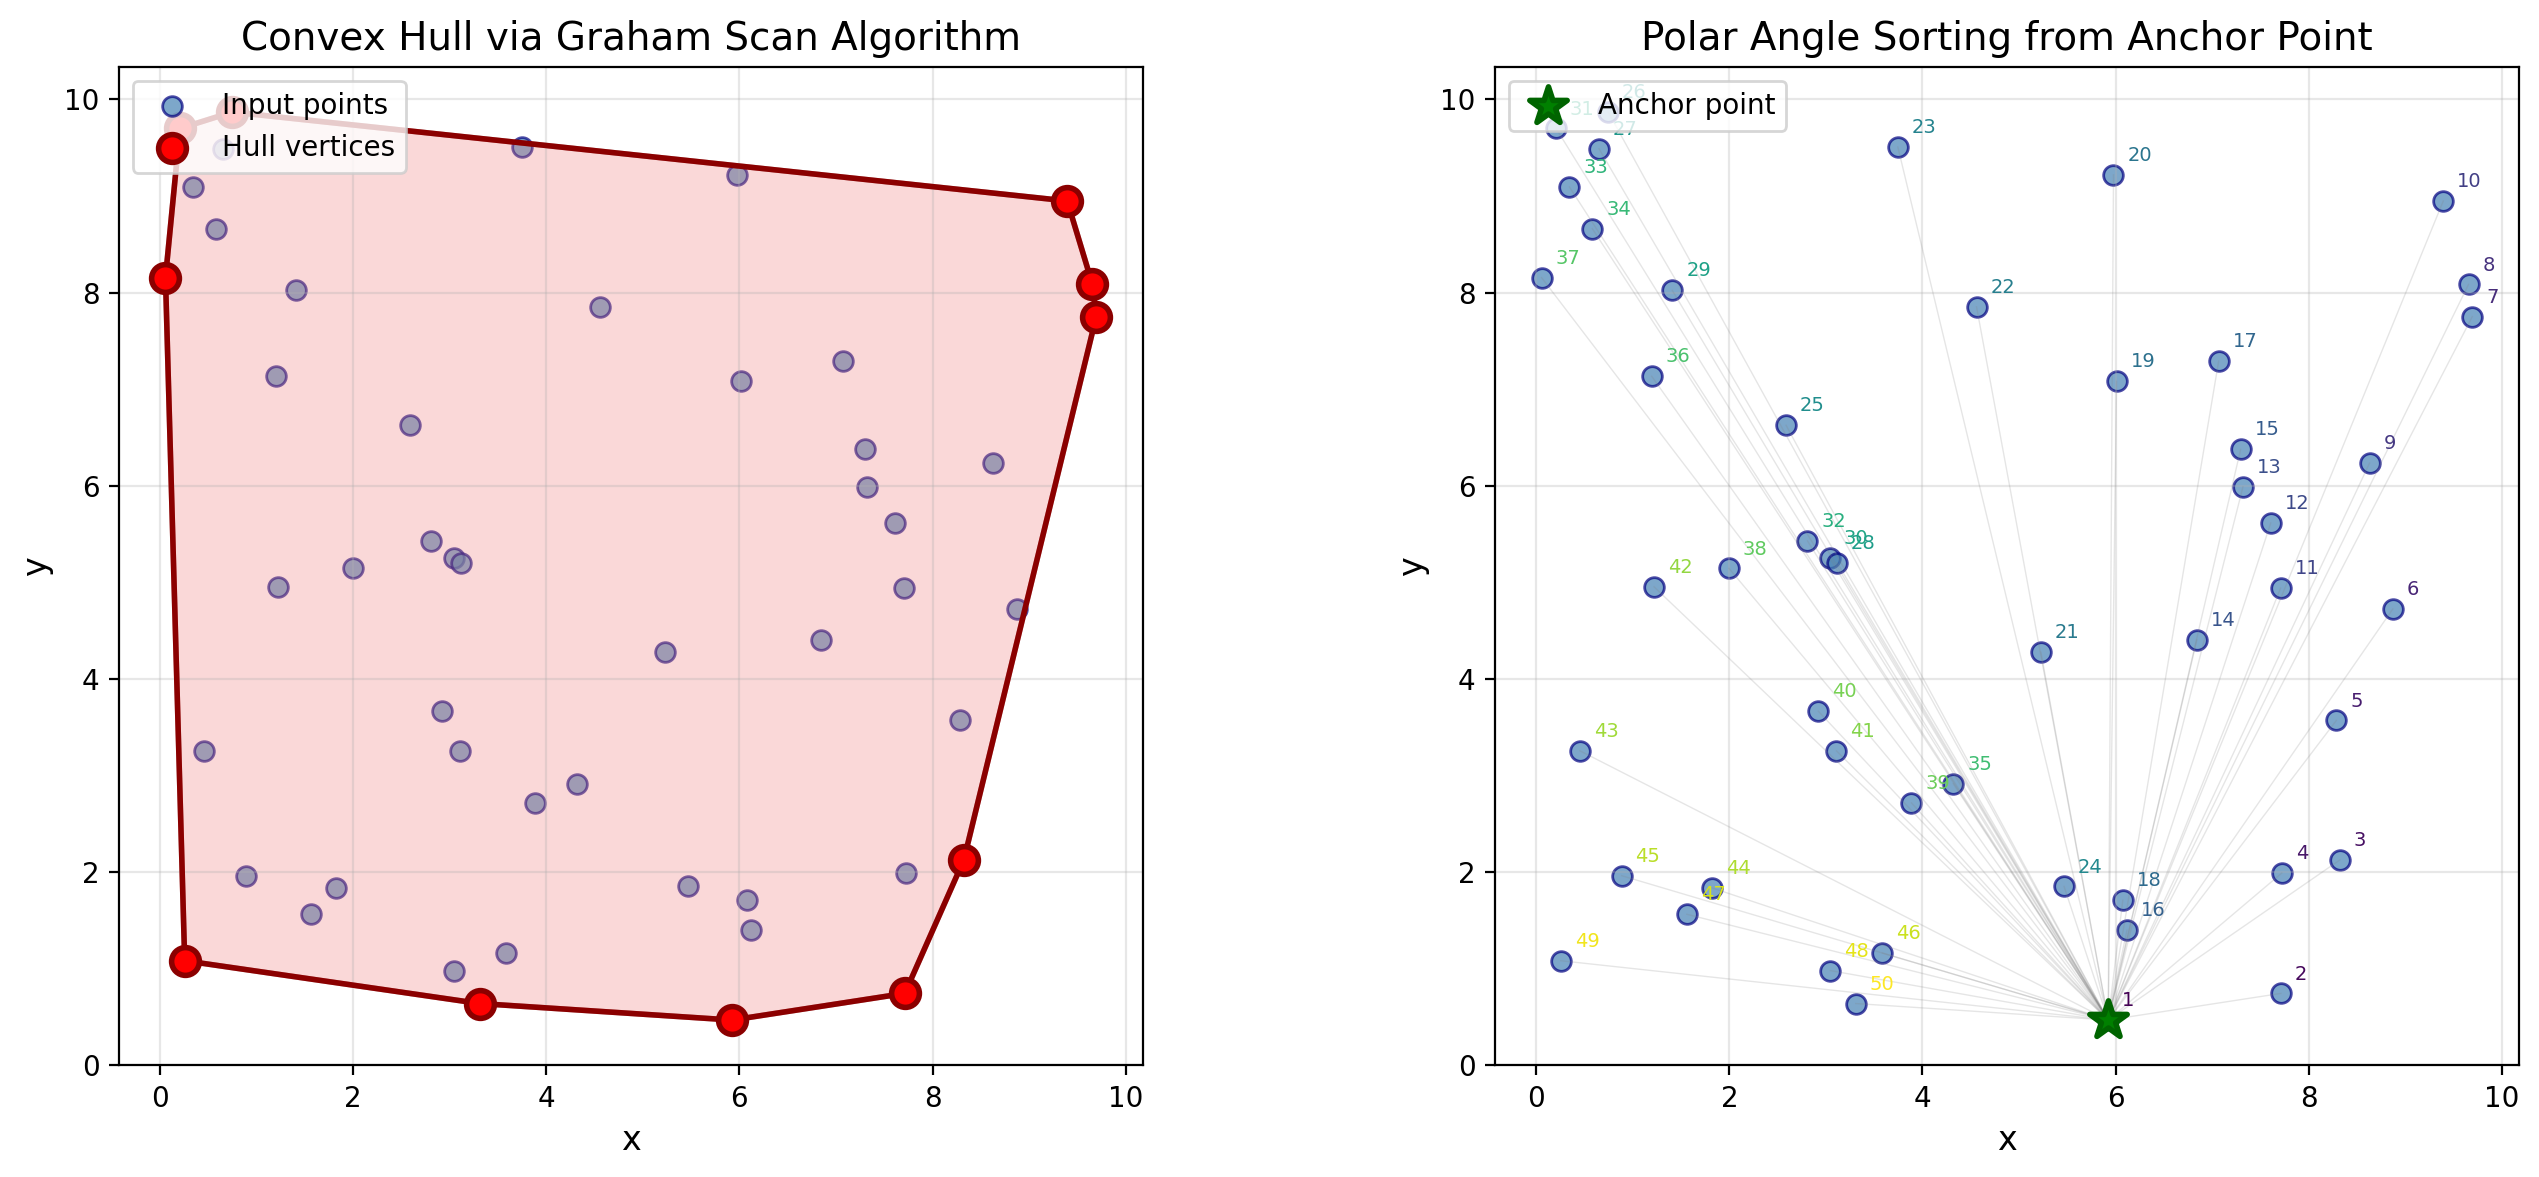


Plot saved to 'plot.png'


In [4]:
# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Input points and convex hull
ax1 = axes[0]
ax1.scatter(points[:, 0], points[:, 1], c='steelblue', s=50, alpha=0.7, 
            edgecolors='navy', linewidth=1, label='Input points')

# Draw convex hull polygon
hull_polygon = Polygon(hull_array, fill=True, facecolor='lightcoral', 
                       edgecolor='darkred', alpha=0.3, linewidth=2)
ax1.add_patch(hull_polygon)

# Highlight hull vertices
ax1.scatter(hull_array[:, 0], hull_array[:, 1], c='red', s=100, 
            marker='o', edgecolors='darkred', linewidth=2, 
            label='Hull vertices', zorder=5)

# Draw hull edges
for i in range(len(hull)):
    p1 = hull[i]
    p2 = hull[(i + 1) % len(hull)]
    ax1.plot([p1[0], p2[0]], [p1[1], p2[1]], 'darkred', linewidth=2)

ax1.set_xlabel('x', fontsize=12)
ax1.set_ylabel('y', fontsize=12)
ax1.set_title('Convex Hull via Graham Scan Algorithm', fontsize=14)
ax1.legend(loc='upper left')
ax1.grid(True, alpha=0.3)
ax1.set_aspect('equal')

# Plot 2: Algorithm visualization - polar angle sorting
ax2 = axes[1]

# Find anchor point
anchor = min([tuple(p) for p in points], key=lambda p: (p[1], p[0]))

# Plot all points
ax2.scatter(points[:, 0], points[:, 1], c='steelblue', s=50, alpha=0.7,
            edgecolors='navy', linewidth=1)

# Highlight anchor point
ax2.scatter([anchor[0]], [anchor[1]], c='green', s=200, marker='*',
            edgecolors='darkgreen', linewidth=2, label='Anchor point', zorder=5)

# Draw lines from anchor to each point to show polar angles
for p in points:
    ax2.plot([anchor[0], p[0]], [anchor[1], p[1]], 'gray', 
             alpha=0.2, linewidth=0.5)

# Show sorting order with color gradient
sorted_pts = sorted([tuple(p) for p in points], 
                   key=lambda p: np.arctan2(p[1] - anchor[1], p[0] - anchor[0]))
colors = plt.cm.viridis(np.linspace(0, 1, len(sorted_pts)))

for i, p in enumerate(sorted_pts):
    ax2.annotate(str(i+1), (p[0], p[1]), xytext=(5, 5), 
                textcoords='offset points', fontsize=7, color=colors[i])

ax2.set_xlabel('x', fontsize=12)
ax2.set_ylabel('y', fontsize=12)
ax2.set_title('Polar Angle Sorting from Anchor Point', fontsize=14)
ax2.legend(loc='upper left')
ax2.grid(True, alpha=0.3)
ax2.set_aspect('equal')

plt.tight_layout()
plt.savefig('convex_hull_algorithm_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nPlot saved to 'plot.png'")

## Verification with SciPy

We can verify our implementation by comparing with SciPy's `ConvexHull` function.

In [5]:
from scipy.spatial import ConvexHull

# Compute convex hull using SciPy
scipy_hull = ConvexHull(points)
scipy_vertices = points[scipy_hull.vertices]

# Compare results
print("Verification against SciPy's ConvexHull:")
print(f"Our implementation: {len(hull)} vertices")
print(f"SciPy implementation: {len(scipy_hull.vertices)} vertices")

# Check if same vertices (order may differ)
our_set = set(hull)
scipy_set = set(tuple(p) for p in scipy_vertices)

if our_set == scipy_set:
    print("\n✓ Both implementations produce the same convex hull vertices!")
else:
    print("\n✗ Results differ - checking for numerical precision issues...")
    # May differ due to floating point precision

Verification against SciPy's ConvexHull:
Our implementation: 11 vertices
SciPy implementation: 11 vertices

✓ Both implementations produce the same convex hull vertices!


## Properties of the Convex Hull

Let us compute some geometric properties of the resulting convex hull.

In [6]:
def compute_hull_area(hull_vertices):
    """
    Compute area using the Shoelace formula:
    A = 1/2 |sum_{i=0}^{n-1} (x_i * y_{i+1} - x_{i+1} * y_i)|
    """
    n = len(hull_vertices)
    area = 0
    for i in range(n):
        j = (i + 1) % n
        area += hull_vertices[i][0] * hull_vertices[j][1]
        area -= hull_vertices[j][0] * hull_vertices[i][1]
    return abs(area) / 2


def compute_hull_perimeter(hull_vertices):
    """Compute the perimeter of the convex hull."""
    n = len(hull_vertices)
    perimeter = 0
    for i in range(n):
        j = (i + 1) % n
        dx = hull_vertices[j][0] - hull_vertices[i][0]
        dy = hull_vertices[j][1] - hull_vertices[i][1]
        perimeter += np.sqrt(dx**2 + dy**2)
    return perimeter


# Calculate properties
area = compute_hull_area(hull)
perimeter = compute_hull_perimeter(hull)

print("Convex Hull Properties:")
print(f"  Area: {area:.4f} square units")
print(f"  Perimeter: {perimeter:.4f} units")
print(f"  Number of vertices: {len(hull)}")
print(f"  Compactness ratio (4πA/P²): {4 * np.pi * area / perimeter**2:.4f}")
print(f"  (Perfect circle = 1.0)")

Convex Hull Properties:
  Area: 76.8419 square units
  Perimeter: 33.9544 units
  Number of vertices: 11
  Compactness ratio (4πA/P²): 0.8376
  (Perfect circle = 1.0)


## Conclusion

The Graham Scan algorithm efficiently computes the convex hull of a point set in $O(n \log n)$ time. The key insight is using the cross product to determine turn directions, which allows us to maintain only the vertices that form the outer boundary.

### Applications

Convex hulls have numerous applications:
- **Collision detection** in computer graphics
- **Pattern recognition** for object boundaries
- **Geographic information systems** for enclosing regions
- **Computational geometry** as a preprocessing step

### Alternative Algorithms

- **Jarvis March (Gift Wrapping)**: $O(nh)$ where $h$ is the number of hull vertices
- **Quickhull**: $O(n \log n)$ average, $O(n^2)$ worst case
- **Chan's Algorithm**: $O(n \log h)$ optimal output-sensitive